In [231]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.style.use('seaborn-dark')

In [151]:
"""Importing the datasets of France's:
- POPULATION
- UNEMPLOYMENT
- POVERTY
- IMMIGRATION
- EDUCATION"""
df_population=pd.read_excel('population.xlsx', sheet_name=None)
df_chomage=pd.read_excel('chomage.xls', sheet_name=None)
df_poverty=pd.read_excel('poverty.xlsx', sheet_name=None)
df_immigration=pd.read_excel('immigration.xlsx', sheet_name=None)
df_baccalaureat=pd.read_excel('bacc.xlsx', sheet_name=None)

In [164]:
"""Only selecting the departmental data, don't care about regional
Including the Frace metro as a dep, but not the provincial one since many don't exist
Taking away the Mayotte departement because the data is all NaN
Departments numbers go from 0 to 101, including france metro"""

df_pop=df_population['DEP']
df_cho=df_chomage['DEP']
df_pov=df_poverty['DEP']
df_imm=df_immigration['DEP']
df_bacc=df_baccalaureat['DEP']

In [165]:
"""POPULATION: years, 2021, 2018, 2013, 2008, 1999"""

df_pop=df_pop[3:104]     #eliminating meaningless rows and columns 
df_pop.reset_index(drop=True, inplace=True)
df_pop.columns=['Dep_number', 'Dep_name', '2021', 'percentage in France','2018', '2013', '2008', '1999']
print(len(df_pop))
df_pop.tail()

101


,Dep_number,Dep_name,2021,percentage in France,2018,2013,2008,1999
96,M,France métropolitaine,65235843,96.8,64844037.0,63697865,62134866,58496613
97,971,Guadeloupe,375693,0.6,387629.0,402119,401784,385609
98,972,Martinique,354824,0.5,368783.0,385551,397693,380863
99,973,Guyane,294146,0.4,276128.0,244118,219266,155760
100,974,La Réunion,857809,1.3,855961.0,835103,808250,703820


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

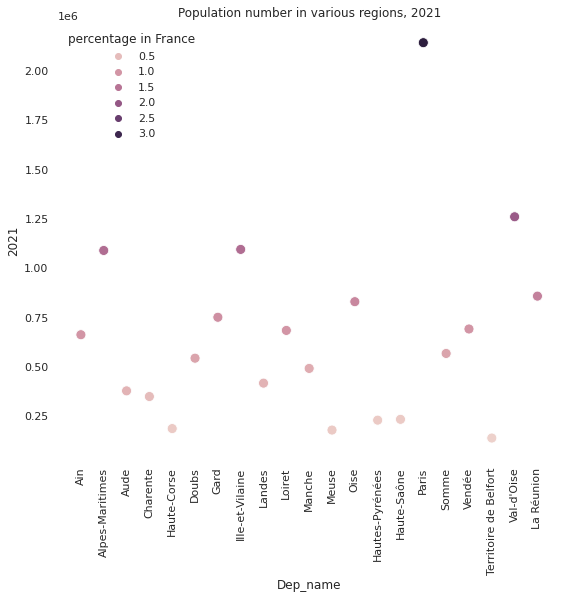

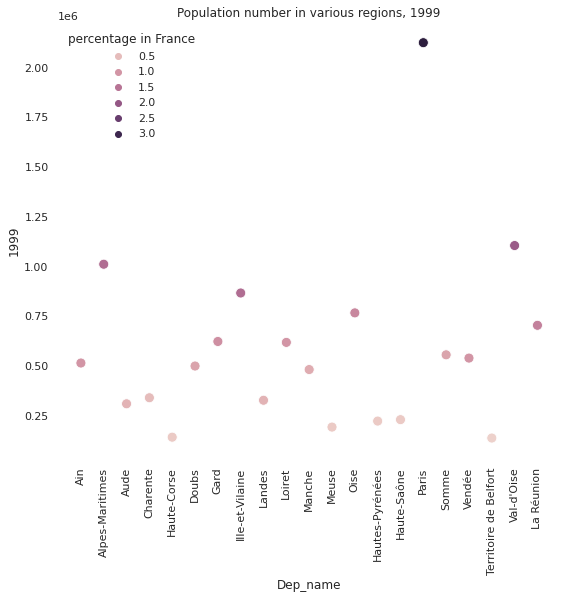

In [238]:
fig, ax = plt.subplots(figsize=(9,8))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pop[::5], x='Dep_name', y="2021", hue='percentage in France', s=100)
plt.title('Population number in various regions, 2021')
plt.xticks(rotation=90)
# sns.displot(data=df_pop[::20], x="2018", kde=True)

f, ax = plt.subplots(figsize=(9,8))
# sns.set(style="white", palette="bright", color_codes=True)
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pop[::5], x='Dep_name', y="1999", hue='percentage in France', s=100)
plt.title('Population number in various regions, 1999')
plt.xticks(rotation=90)

In [194]:
"""UNEMPLOYMENT tax in 2019"""

df_cho=df_cho[3:105]
df_cho=df_cho.drop([99])  #dropping the province, keeping metro
df_cho.reset_index(drop=True, inplace=True)
df_cho.columns=['Dep_number', 'Dep_name', 'All', 'M','F', '15-24 y', '25-49 y', '50+ y']
print(len(df_cho))
df_cho.tail()

101


,Dep_number,Dep_name,All,M,F,15-24 y,25-49 y,50+ y
96,M,France métropolitaine,8.2,8.2,8.1,19,7.5,6.1
97,971,Guadeloupe,20.5,18.6,22.2,52.7,20.8,14.5
98,972,Martinique,14.9,17.1,12.9,48,16.2,8.2
99,973,Guyane,19.9,19.8,20,39.6,19.8,12.3
100,974,La Réunion,21.3,21,21.7,45.9,19.9,15.7


Text(0, 0.5, 'Departement')

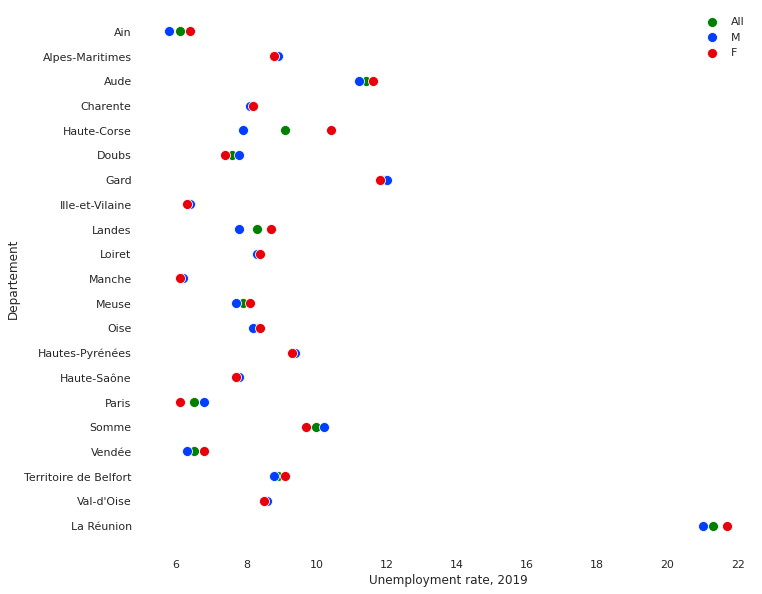

In [255]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_cho[::5],x="All", y="Dep_name" , color='green', label='All', s=100)

sns.scatterplot(data=df_cho[::5],x="M", y="Dep_name", color='b' , label='M', s=100)
sns.scatterplot(data=df_cho[::5],x="F", y="Dep_name", color='r', label='F' , s=100)
plt.xlabel("Unemployment rate, 2019")
plt.ylabel("Departement")

In [252]:
"""POVERTY rate in 2018"""

df_pov=df_pov[3:]
df_pov.reset_index(drop=True, inplace=True)
df_pov.columns=['Dep_number', 'Dep_name', 'All', '-30 y','30-39 y', '40-49 y', '50-59 y', '60-74 y', '75+ y']
print(len(df_pov))
df_pov.head()

101


,Dep_number,Dep_name,All,-30 y,30-39 y,40-49 y,50-59 y,60-74 y,75+ y
0,01,Ain,10.3,14.9,11.8,11.4,10.1,7.5,7.2
1,02,Aisne,18.4,29.7,22.8,21.2,18.4,11.6,9.5
2,03,Allier,15.5,25.3,19.7,18.2,16.1,10.6,10.2
3,04,Alpes-de-Haute-Provence,16.8,24.9,20.9,20.3,17.2,12.3,11.3
4,05,Hautes-Alpes,13.9,19.9,16.9,16.6,14.6,9.6,10.2


Text(0, 0.5, 'Departement')

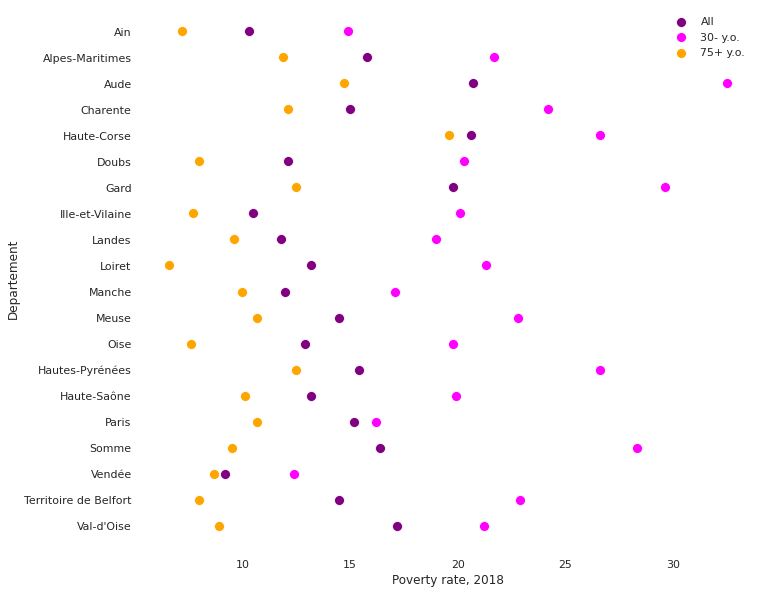

In [254]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pov[::5],x="All", y="Dep_name" , color='purple', label='All', s=100)

sns.scatterplot(data=df_pov[::5],x="-30 y", y="Dep_name", color='magenta' , label='30- y.o.', s=100)
sns.scatterplot(data=df_pov[::5],x="75+ y", y="Dep_name", color='orange', label='75+ y.o.' , s=100)
plt.xlabel("Poverty rate, 2018")
plt.ylabel("Departement")

In [260]:
"""IMMIGRATION in 2017. Incomplete in departments. Does not comprehend the islands and outside territories."""

df_imm=df_imm[3:100]
df_imm.reset_index(drop=True, inplace=True)
df_imm.columns=['Dep_number', 'Dep_name', 'immigrants_n', 'Population_percentage','European immigrants', 'Algerian immigrants', 'Maroccan immigrants', 'Tunisian immigrants', 'Turkish immigrants']
print(len(df_imm))
df_imm.head()

97


,Dep_number,Dep_name,immigrants_n,Population_percentage,European immigrants,Algerian immigrants,Maroccan immigrants,Tunisian immigrants,Turkish immigrants
0,01,Ain,75414,11.7,37.2,5.5,11.5,2.6,8.1
1,02,Aisne,23635,4.4,36.4,10.7,18.2,2.5,6.5
2,03,Allier,16684,4.9,48.3,8.1,8.8,2.5,4.3
3,04,Alpes-de-Haute-Provence,12782,7.8,49,10.3,12.2,2.8,2.1
4,05,Hautes-Alpes,7782,5.5,50,8.8,7.2,5.1,3.2


Text(0.5, 0, 'Number of immigrans, 2017')

<Figure size 360x720 with 0 Axes>

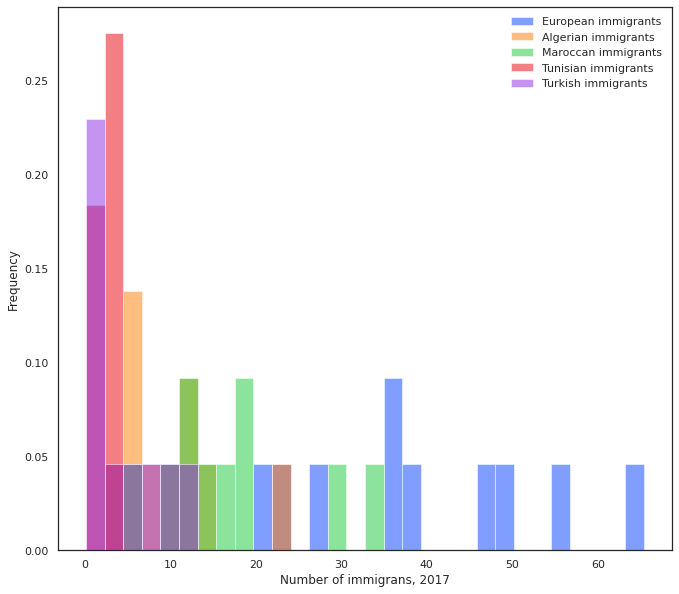

In [285]:

red_imm=df_imm[['European immigrants', 'Algerian immigrants', 'Maroccan immigrants', 'Tunisian immigrants', 'Turkish immigrants']]
sns.despine(left=True, bottom=True)
fig=red_imm[::10].plot.hist(alpha=0.5,figsize=(11,10), bins=30, density=True)
plt.xlabel("Number of immigrans, 2017")

In [284]:
"""BACCALAUREATE results in 2019"""
df_bacc=df_bacc[4:106]
df_bacc=df_bacc.drop([100])  #dropping the province, keeping metro
df_bacc.reset_index(drop=True, inplace=True)
df_bacc.columns=['Dep_number', 'Dep_name', 'General_n', 'General_success','Tecnical_n', 'Tecnical_success',
                 'Professional_n', 'Professional_success', 'Total_n', 'Total_success']
print(len(df_bacc))
df_bacc.tail(10)

101


,Dep_number,Dep_name,General_n,General_success,Tecnical_n,Tecnical_success,Professional_n,Professional_success,Total_n,Total_success
91,91,Essonne,8158,90.4,3082,85.6,3159,76.7,14399,86
92,92,Hauts-de-Seine,10075,91,2406,82,2623,76.2,15104,86.6
93,93,Seine-Saint-Denis,8065,87.1,3904,86.3,4501,77.4,16470,84
94,94,Val-de-Marne,7127,90.2,2903,87.5,3159,81.4,13189,87.4
95,95,Val-d'Oise,7308,84.5,3050,82.1,3186,74.7,13544,81.4
96,M,France métropolitaine,344135,91.2,131781,88.3,165759,82.6,641675,88.3
97,971,Guadeloupe,2578,90.5,1207,92.1,1683,81.6,5468,87.9
98,972,Martinique,2145,90,1003,90.1,1297,77.9,4445,86.1
99,973,Guyane,1182,84.3,652,82.6,1124,72.3,2958,79
100,974,La Réunion,5199,92.4,2718,87.4,3008,81.9,10925,88.1


Text(0, 0.5, 'Departement')

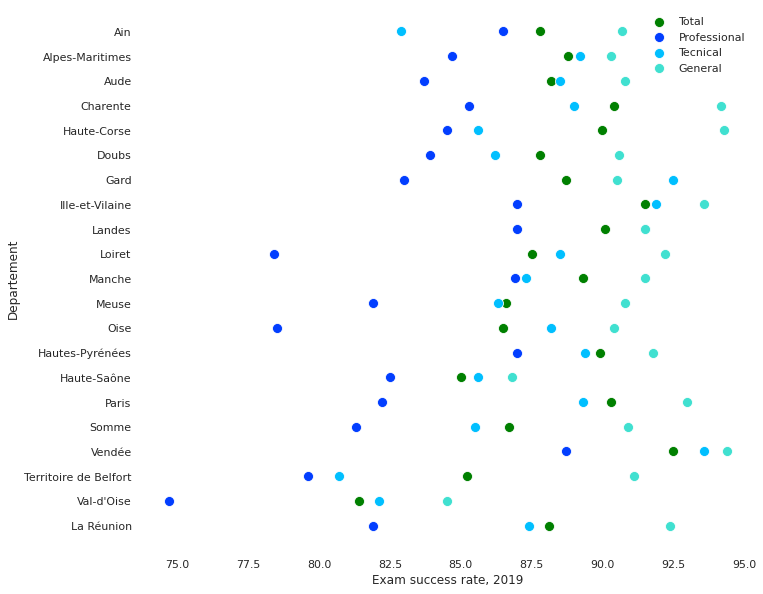

In [286]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_bacc[::5],x="Total_success", y="Dep_name" , color='green', label='Total', s=100)

sns.scatterplot(data=df_bacc[::5],x="Professional_success", y="Dep_name", color='b' , label='Professional', s=100)
sns.scatterplot(data=df_bacc[::5],x="Tecnical_success", y="Dep_name", color='deepskyblue', label='Tecnical' , s=100)
sns.scatterplot(data=df_bacc[::5],x="General_success", y="Dep_name", color='turquoise', label='General' , s=100)
plt.xlabel("Exam success rate, 2019")
plt.ylabel("Departement")

In [124]:
"""Importing France crime dataset, per month from 1996 to 2021. This is the most 
complicated and complete dataset to work with"""

df=pd.read_excel('crime.xlsx', sheet_name=None)
tot=(df['France_Entière'])
metro=(df['France_Métro'])

In [29]:
crime_reason=list(tot['libellé index'])

In [30]:
tot=tot.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
metro=metro.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])

In [31]:
"""The departments 1-95, 971-978, 986-988 data"""
dep=[]
for key, value in df.items():
    dep.append(key)
dep=dep[2:]  # because the first two are total and metro
print(dep)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']


In [32]:
"""reversing to have 2000 first, to 2021"""
tot=tot.iloc[:,::-1]
metro=metro.iloc[:,::-1]
print(tot,metro)

     _2000_01  _2000_02  _2000_03  _2000_04  _2000_05  _2000_06  _2000_07  \
0          11         5         9         2         5        12         5   
1           2         5         6         7         4         4         5   
2          60        96        70        76        77        62        75   
3           7        10         9         5        14        14        10   
4          65        91       104        63       106        85       101   
..        ...       ...       ...       ...       ...       ...       ...   
102       128        86        64        77        65        51        62   
103       170       176       174       209       166       171       217   
104        36        44        50        40        43        35        26   
105       137       154       191       188       180       154       130   
106      5510      6557      7039      5975      6456      6356      6124   

     _2000_08  _2000_09  _2000_10  ...  _2020_03  _2020_04  _2020_05  \
0  

In [33]:
"""Summing every 12 elements in each row to get avg per year"""
tot_sum_row = tot.groupby([[i//12 for i in range(0,len(tot.columns))]], axis = 1).sum()
metro_sum_row = metro.groupby([[i//12 for i in range(0,len(metro.columns))]], axis = 1).sum()

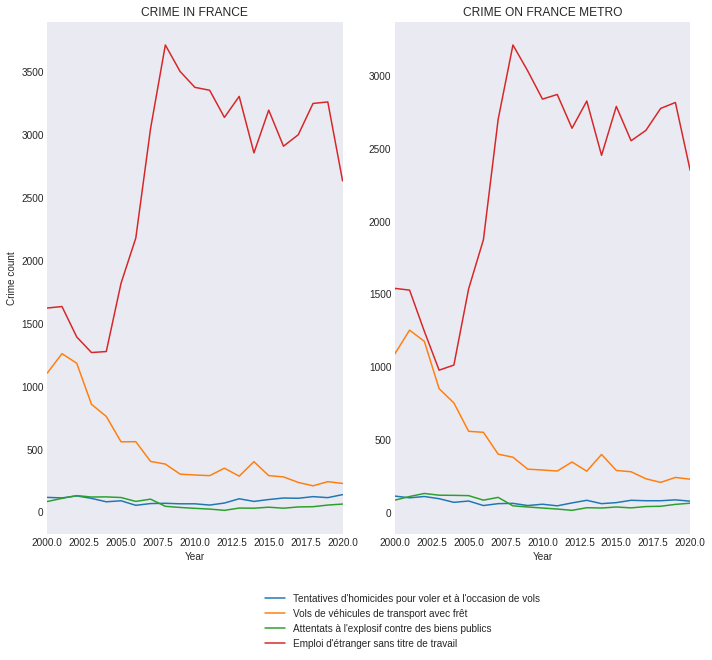

In [34]:
"""Example of crime"""

year=list(range(1996, 2021))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(3, len(crime_reason), 30):
    ax[0].plot(year[4:len(year)], tot_sum_row.iloc[i], label=crime_reason[i])
for i in range(3, len(crime_reason), 30):
    ax[1].plot(year[0:len(year)], metro_sum_row.iloc[i])
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_ylabel("Crime count")
ax[0].set_xlabel("Year")
ax[1].set_xlabel("Year")
ax[0].set_xlim(2000,2020)
ax[1].set_xlim(2000,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

No handles with labels found to put in legend.


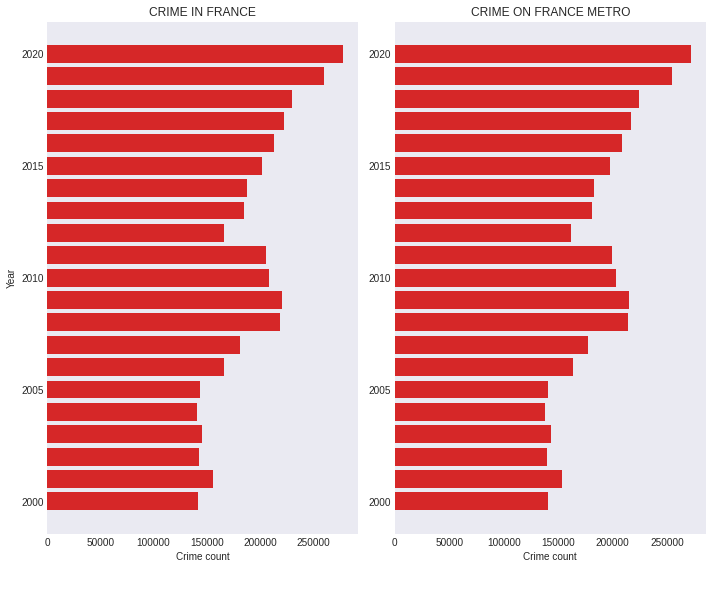

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(0, len(crime_reason), 30):
    ax[0].barh(year[4:len(year)], tot_sum_row.iloc[i])
for i in range(0, len(crime_reason), 30):
    ax[1].barh(year[4:len(year)], metro_sum_row.iloc[i][4:], label='_nolegend_')
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_xlabel("Crime count")
ax[0].set_ylabel("Year")
ax[1].set_xlabel("Crime count")
# ax[0].set_xlim(2000,2020)
# ax[1].set_xlim(1996,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

In [37]:
tot_sum_col=tot.sum(axis = 0, skipna = True)
metro_sum_col=metro.sum(axis = 0, skipna = True)

In [38]:
tot_sum_col

_2000_01    285800
_2000_02    299474
_2000_03    331817
_2000_04    294781
_2000_05    341197
             ...  
_2020_08    310153
_2020_09    327112
_2020_10    317650
_2020_11    277753
_2020_12    285750
Length: 252, dtype: int64

In [39]:
len(tot_sum_col), len(metro_sum_col)

(252, 300)

In [40]:
"""grouping months to have only year
n is the number of columns you want to group together
m is the total number of columns being grouped"""
tot_sum_col = tot_sum_col.groupby([[i//12 for i in range(0,len(tot_sum_col))]], axis = 0).sum()
metro_sum_col = metro_sum_col.groupby([[i//12 for i in range(0,len(metro_sum_col))]], axis = 0).sum()

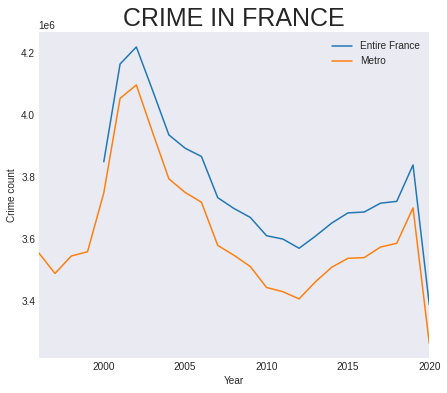

In [41]:
plt.figure(figsize=(7,6))
plt.plot(year[4:len(year)], tot_sum_col, label="Entire France")
plt.plot(year[0:len(year)], metro_sum_col, label="Metro")
plt.ylabel("Crime count")
plt.xlabel("Year")
plt.xlim(1996, 2020)
plt.legend()
plt.title("CRIME IN FRANCE", size=25)
plt.show()
plt.close()

In [43]:
"""Making a copy of the whole df dictionary so not to edit original one"""
dep_crime_list=[]
dep_df = copy.deepcopy(df)
for i in range(len(dep)):
    dep_df[dep[i]]=dep_df[dep[i]].drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
    dep_df[dep[i]]=dep_df[dep[i]].iloc[:, ::-1]
    dep_sum_col = dep_df[dep[i]].sum(axis = 0, skipna = True)
    dep_sum_col = dep_sum_col.groupby([[i//12 for i in range(0,len(dep_sum_col))]], axis = 0).sum()
    dep_crime_list.append(dep_sum_col)
    

In [18]:
"""Creating map with color intensity for cases of crime
change year range to get appropriate maps"""

import pygal 
from pygal.maps import fr

for l in range(0, len(year), 10):
    fr_chart = pygal.maps.fr.Departments(human_readable=True)
#     fr_chart.title = 'Year '+str(year[l])
    
#         print(dep_crime_list[i][l], dep[i], year[l])
    fr_chart.add('In '+ str(year[l])+'', {
                 str(dep[i]): dep_crime_list[i][l] for i in range(len(dep[:-11]))})

    fr_chart.render()
    # fr_chart.render_to_file('france.svg')
    fr_chart.render_to_png('france_crime'+str(year[l])+'.png')

In [19]:
len(year)

25